In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import  Dense
from tensorflow.keras.models import Sequential


In [ ]:
mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_validation,y_validation) = mnist.load_data()

x_train = x_train.reshape(60000,784)
x_validation = x_validation.reshape(10000,784)
x_train = x_train.astype("float32")
x_validation = x_validation.astype("float32")


11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
x_train /= 255
x_validation /= 255

y_train = to_categorical(y_train, num_classes=10, dtype='int64')
y_validation = to_categorical(y_validation, num_classes=10, dtype='int64')

In [ ]:
print("train samples", x_train.shape)
print("test samples",x_validation.shape)

train samples (60000, 784)
test samples (10000, 784)


In [ ]:
print("train label samples", y_train.shape)
print("test label samples",y_validation.shape)

train label samples (60000, 10)
test label samples (10000, 10)


In [ ]:
model = Sequential()

model.add(Dense(512,input_dim = 784,activation="relu"))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='sigmoid'))


In [ ]:
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath="model.hdf5",monitor="val_loss",verbose=1,save_best_only = True)

history = model.fit(x_train,y_train,validation_data=(x_validation,y_validation),epochs = 10,callbacks=[checkpointer])

Epoch 1/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.2620 - accuracy: 0.9237
Epoch 1: val_loss improved from inf to 0.15092, saving model to model.hdf5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2617 - accuracy: 0.9237 - val_loss: 0.1509 - val_accuracy: 0.9592
Epoch 2/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.1049 - accuracy: 0.9703
Epoch 2: val_loss improved from 0.15092 to 0.09751, saving model to model.hdf5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1048 - accuracy: 0.9703 - val_loss: 0.0975 - val_accuracy: 0.9706
Epoch 3/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0754 - accuracy: 0.9787
Epoch 3: val_loss improved from 0.09751 to 0.08591, saving model to model.hdf5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0753 - accuracy: 0.9787 - val_loss: 0.0859 - val_accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - ETA: 0s - lo

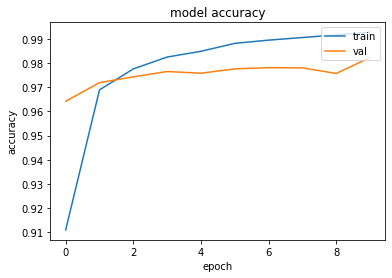

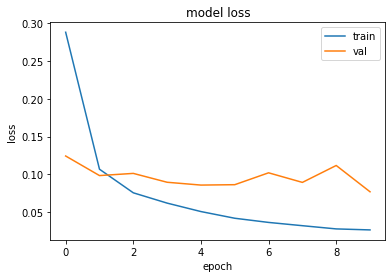

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

1/1 [==============================] - 0s 129ms/step
I am confident around 100.00% that this image corresponds to digit 4


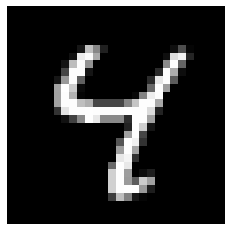

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model.hdf5')
import cv2
from matplotlib import pyplot as plt

image = x_validation[8].reshape(28,28)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

datapoint = x_validation[6].reshape(1,784)
predict_prob = model.predict(datapoint)
print('I am confident around {:.2f}% that this image corresponds to digit {}'.format(np.amax(predict_prob)*100, np.argmax(predict_prob)))